Recherche le nombre de cercles ne se recouvrant pas.

In [2]:
import math
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

In [3]:
PI = math.pi
R = 10

def polar_to_cart(theta, r = R) :
    """
    Convertit les coordonnées polaires en cartésiennes
    """
    x = r * math.cos(theta)
    y = r * math.sin(theta)
    return x, y

def radian_to_deg(theta) :
    return theta * 180 / PI
def deg_to_radian(theta) :
    return theta * PI / 180

def Angle(x) :
    """
    Compte tenu de la valeur de mon sinus,
    Retourne :
    la valeur en radian de l'angle
    le nombre de fois ou je peux le retrouver dans un cercle
    """
    theta = math.asin(x) * 2
    max_div = int(2 * PI / theta)
    approx_theta = 2 * PI / max_div
    return max_div, approx_theta

In [4]:
# Nombre de sections pour des cercles ne se recouvrant pas du tout
m_div, theta = Angle(1/4)
angle = [i * 2 * theta for i in range(int(m_div/2))]
pos =  list(map(lambda x : polar_to_cart(x, R), angle))


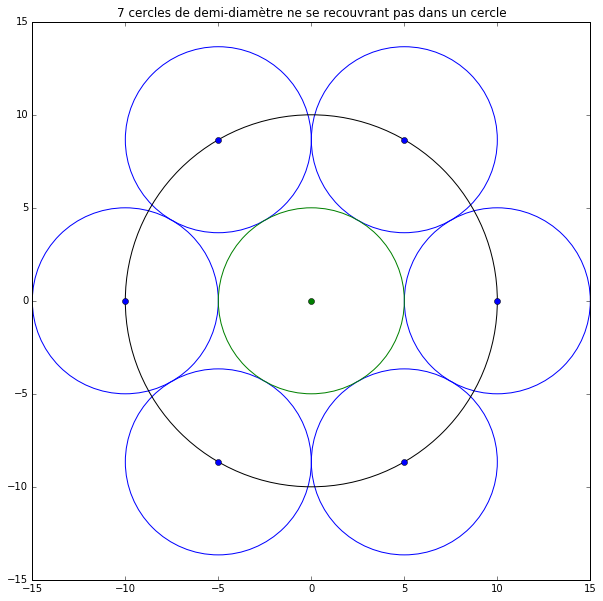

In [5]:
positions = np.array(pos).T
x = positions[0]
y = positions[1]

fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(x, y, 'o')
ax.plot(0, 0, 'o')

for i, j in pos :
    
    crc = plt.Circle((i, j), R/2, color = 'b', fill=False)
    ax.add_artist(crc)
crc = plt.Circle((0, 0), R/2, color = 'g', fill = False)
ax.add_artist(crc)

crc = plt.Circle((0, 0), R, fill = False)
ax.add_artist(crc)

ax.set_xlim([-R * 1.5, R * 1.5])
ax.set_ylim([-R * 1.5, R * 1.5])
ax.set_title("7 cercles de demi-diamètre ne se recouvrant pas dans un cercle")
# NB : il y a de l'expansion, mais aussi des trous, ce qui peut être problématique.
# Dans le cas suivant, recouvrement, mais pas de trous

In [6]:
# Pour la couronne externe
m_div, theta_ext = Angle(1/4)
angle_ext = [i * theta_ext for i in range(m_div)]
pos_ext =  list(map(lambda x : polar_to_cart(x, R), angle_ext))

In [7]:
# Pour la couronne interne
m_div, theta_int = Angle(1/2)
angle_int = [i * theta_int for i in range(m_div)]
pos_int =  list(map(lambda x : polar_to_cart(x, R/2), angle_int))

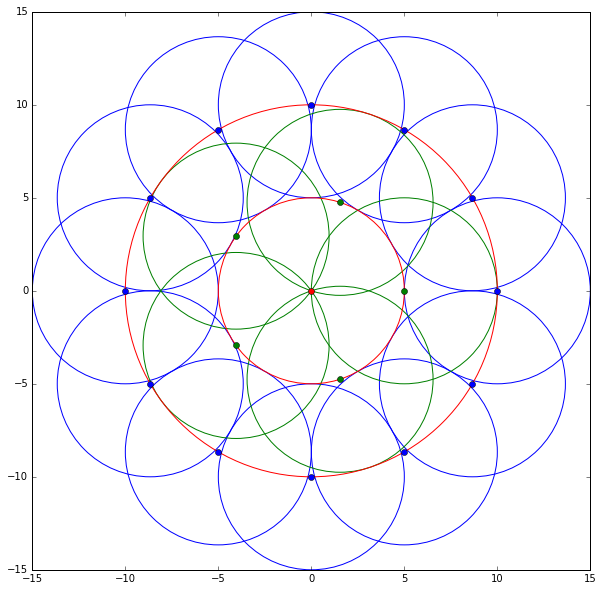

In [8]:


fig, ax = plt.subplots(figsize = (10, 10))

# cercle ext
positions = np.array(pos_ext).T
x = positions[0]
y = positions[1]
ax.plot(x, y, 'o')

# cercle int
positions = np.array(pos_int).T
x = positions[0]
y = positions[1]
ax.plot(x, y, 'o')

ax.plot(0, 0, 'o')

for i, j in pos_ext :
    crc = plt.Circle((i, j), R/2, color = 'b', fill=False)
    ax.add_artist(crc)

for i, j in pos_int :
    crc = plt.Circle((i, j), R/2, color = 'g', fill=False)
    ax.add_artist(crc)
    
    
crc = plt.Circle((0, 0), R/2, color = "r", fill = False)
ax.add_artist(crc)

crc = plt.Circle((0, 0), R, color = 'r', fill = False)
ax.add_artist(crc)
ax.set_xlim([-R * 1.5, R * 1.5])
ax.set_ylim([-R * 1.5, R * 1.5])

# Recouvrement parfait, augmentation de la surface
ntot = len(pos_ext) + len(pos_int) + 1

In [10]:
print("Nombre de cercles : ")
print("\tExternes :", len(pos_ext))
print("\tInternes :", len(pos_int))
print("Total :", len(pos_ext) + len(pos_int) + 1)

Nombre de cercles : 
	Externes : 12
	Internes : 5
Total : 18
